In [1]:
import andi
import numpy as np
import csv as csv
import numpy as np

from sklearn.metrics import mean_absolute_error


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import losses, metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM

from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.models import load_model
import os
from traj_norm import traj_norm


Using TensorFlow backend.


In [50]:
os.getcwd()

'/Users/stebo/andi_num/ANDI_datasets-master'

In [ ]:
/Users/stebo/andi_num/ANDI_datasets-master/datasets/Development dataset for Training

In [2]:
AD = andi.andi_datasets()


Important to create a "balanced" data set

In [116]:
bbe={}
cce={}
cl=25+100*np.arange(10)
j=0
for i in [725]:
    X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = 20000, tasks = 1, dimensions = 1,
                                             min_T = i, max_T = i+1, save_dataset=True, path_datasets=str(i)+'multi')
    bbe[i]=X1[0]
    cce[i]=Y1[0]

Creating a dataset for task(s) 1 and dimension(s) 1.
Generating dataset for dimension 1.


/Users/stebo/anaconda3/lib/python3.7/site-packages/fbm/fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "
/Users/stebo/anaconda3/lib/python3.7/site-packages/andi/diffusion_models.py:85: RuntimeWarning: overflow encountered in power
  dt = (1-np.random.rand(T))**(-1/sigma)


In [3]:
#subset for quick checking
bb={}
cc={}
cl=25+100*np.arange(3)
j=0
for i in cl:
    X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = 1000, tasks = 1, dimensions = 1,
                                             min_T = i, max_T = i+1, load_dataset=True, path_datasets=str(i)+'multi')
    bb[i]=X1[0]
    cc[i]=Y1[0]

Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.


In [14]:
bb={}
cc={}
cl=25+100*np.arange(10)
j=0
for i in cl:
    X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = 10000, tasks = 1, dimensions = 1,
                                             min_T = i, max_T = i+1, load_dataset=True, path_datasets=str(i)+'multi')
    bb[i]=X1[0]
    cc[i]=Y1[0]

Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.


In [3]:
bbv={}
ccv={}
cl=25+100*np.arange(10)
j=0
for i in cl:
    X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = 1000, tasks = 1, dimensions = 1,
                                             min_T = i, max_T = i+1, load_dataset=True, path_datasets=str(i)+'multi_val')
    bbv[i]=X1[0]
    ccv[i]=Y1[0]

Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.
Creating a dataset for task(s) 1 and dimension(s) 1.


In [4]:
pro=np.asarray(bb[25])

In [6]:
pro.shape

(10000, 25)

In [7]:
len(pro)

10000

In [4]:
def traj_norm(data_tot):
    '''
    function to normalize a rectangular array so that each of its rows have mean=0 and std=1'''







 
    traj_len=len(np.transpose(data_tot)) #Trajectory length
    mean_traj=np.mean(data_tot,axis=1)   #1d Array with mean of each of the trajectories
    mean_array=np.tile(np.transpose([mean_traj])
                       ,(1,traj_len)) #rectangular array, with traj_len copies of the means
    std_array=np.tile(np.transpose([np.std(data_tot,axis=1)])
                      ,(1,traj_len))  #rectangular array, with traj_len copies of the std of each trajectory
    data_norm=(data_tot-mean_array)/(np.tile(np.transpose([np.std(data_tot,axis=1)]),
                                                            (1,traj_len)))
       
#RESHAPING
    return data_norm
   

In [8]:
pro_norm=traj_norm(pro)

In [9]:
pro_norm[:10,:]

array([[-0.83063405, -1.26866713, -1.29882173, -0.85379755, -0.44189566,
        -2.05308506, -0.59673852, -1.33958324, -0.87381175, -0.42801392,
        -0.71223888, -0.47840456,  0.18650883,  0.4247976 ,  0.67346841,
         0.91831653,  0.31438472,  1.60112413,  0.83433415,  1.38107477,
         1.60541461,  0.93973064,  0.62182656,  0.7559704 ,  0.91874069],
       [-1.57380011, -1.74841798, -1.44137628, -0.65129037, -0.70650158,
         0.2702195 , -0.49984613, -0.08853473, -0.25679247,  0.04133494,
         0.53167171,  1.58970055,  1.18778022,  0.80037053,  1.14674253,
         0.94138178,  1.77398285,  1.74168075, -0.51595199, -0.58809025,
        -0.55359183,  0.03571147,  0.14667032, -0.23041849, -1.35263493],
       [-3.07396652,  1.95337098,  0.23385545, -0.18790052,  0.11115691,
         0.17505152,  1.07448304,  1.74114653,  0.80552235,  0.02106745,
        -0.13615816,  0.86160029,  0.59227411, -0.41912945,  0.22763009,
        -0.75313027, -0.21730231, -0.83590612, -1

In [10]:
np.max(np.mean(pro_norm,axis=1))

9.37028232783632e-16

In [11]:
np.min(np.std(pro_norm,axis=1))

0.9999999999999997

In [5]:
#FUNCTION TO TURN SPLIT DATA IN NORMALIZED SUB-TRAJECTORIES.
#Possible to choose data corresponding to a certain interval of h
#USING TIMES TOO Otpion to normalize!!
#Should find a more elegant way of using the hmin and hmax, now i have to express it anyway
def data_split(data_tot,meas_times,labels,start_row,num_row,traj_len,
               n_in,n_samples,hmin=0.,hmax=1,limith=False,normalization=True,p_p=1):
    '''
    returns data_tot: collection of recorded trajectories and associated time stamps,
    split into normalized sub-trajectories. It also returns the associated labels, and
    separately the time stamps and trajectories.
    PARAMETERS EXPLANATION:
    meas_times: times at which the position was recorded,
    labels: the true exponent corresponding with which the trajectory was generated
    start_row: exclude recorded trajectories with index i<start_row
    num_row: number of recorde trajectories to use (NB the actual number
    will be <total number-start_row) 
    traj_len: length of the trajectory segments to output
    n_in: starting data point from the recorded data
    n_samples: number of the trajectory segments to take from each recorded trajectory
    h_min: use only trajectories genearted with h>h_min
    h_max: use only trajectories genearted with h<h_max
    p_p: factor introduced to roughly normalize the time steps so that the total trajectory
    duration is close to 1'''
    j=0



    tr=data_tot[start_row:num_row+start_row]
    sel_times=meas_times[start_row:num_row+start_row]
    tar=labels[start_row:num_row+start_row]

    if(limith==True):
        
        tr=tr[np.where((tar<=hmax) & (tar >=hmin))]
        sel_times=sel_times[np.where((tar<=hmax) & (tar >=hmin))]
        tar=tar[((tar<=hmax) & (tar >=hmin))]

    if(n_samples>1):
        
        gap=int((data_tot.shape[1]-n_in-traj_len)/(n_samples-1))
    else:
        gap=0    
    print("n initial=",n_in,"gap=",gap)
    if(gap<traj_len):
        print("warning!! Overlapping trajectories. gap=",
              gap,"trajectory length=",traj_len,"final_point=",
              (n_samples-1)*gap+n_in+traj_len,"data length",data_tot.shape[1])

    if(normalization==True):
        trj=tr[:,n_in+gap*j:n_in+gap*j+traj_len]
        test_data_new=(trj-(np.tile(np.transpose([np.mean(trj,axis=1)]),
                                    (1,traj_len))))/(np.tile(np.transpose([np.std(trj,axis=1)]),
                                                             (1,traj_len)))
        test_times=np.cumsum(np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len])
                                       ,0,0, axis=1),axis=1)
#train_data_new=(data_tot[start_row:30000,:traj_len]-(np.tile(np.transpose([np.mean(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len))))/(np.tile(np.transpose([np.std(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len)))
        test_labels_large=tar
#test_labels=labels[start_row:num_row+start_row]
        #print(test_data_new.shape)
        #print("trj=",trj.shape)
        #print("sart=",n_in+gap*j,"end=",n_in+gap*j+traj_len)
        for j in range(1,n_samples):
            trj=tr[:,n_in+gap*j:n_in+gap*j+traj_len]
            #print("sart=",n_in+gap*j,"end=",n_in+gap*j+traj_len)
            #print(trj.shape)
            test_data_new=np.concatenate((test_data_new,(trj-(np.tile(np.transpose([np.mean(trj,axis=1)]),(1,traj_len))))/(np.tile(np.transpose([np.std(trj,axis=1)]),(1,traj_len)))),axis=0)
    #test_data_new=np.concatenate((test_data_new,(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]-np.mean(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]))/np.std(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len])),axis=0)
            test_labels_large=np.append(test_labels_large,tar)
            test_times=np.concatenate((test_times,np.cumsum(np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len]),0,0, axis=1),axis=1)),axis=0)
    #test_labels=np.append(test_labels,many_label2)  
    else:
        test_data_new=tr[:,n_in+gap*j:n_in+gap*j+traj_len]
        test_times=np.cumsum(np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len]),
                                       0,0, axis=1),axis=1)
#train_data_new=(data_tot[start_row:30000,:traj_len]-(np.tile(np.transpose([np.mean(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len))))/(np.tile(np.transpose([np.std(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len)))
        test_labels_large=tar
#test_labels=labels[start_row:num_row+start_row]
        for j in range(1,n_samples):
            test_data_new=np.concatenate((test_data_new,tr[:,n_in+gap*j:n_in+gap*j+traj_len]),
                                         axis=0)
    #test_data_new=np.concatenate((test_data_new,(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]-np.mean(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]))/np.std(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len])),axis=0)
            test_labels_large=np.append(test_labels_large,tar)
            test_times=np.concatenate((test_times,np.cumsum(
                np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len]),0,0, axis=1),
                axis=1)),axis=0)
    #test_labels=np.append(test_labels,many_label2) 
        


#normalization of time stamps, potentially dangerous!!!!!!!
    test_times=test_times*p_p/traj_len
    
#RESHAPING
    test_set=np.transpose(np.array((np.transpose(test_data_new),np.transpose(test_times))))  
    return test_set, test_labels_large, test_data_new,test_times
   

In [24]:
len(bb[25])

10000

In [27]:
i=25
test_tim_step=np.arange(i)
show_time_coll=np.tile(test_tim_step,(len(bb[i]),1))
data_show,label_show,traj_show,times_show=data_split(
    np.asarray(bb[i]),show_time_coll,labels=np.asarray(cc[i]),start_row=0,
    num_row=10000,traj_len=i,n_in=0,n_samples=1,
    p_p=1,hmin=0.25,hmax=0.75,limith=False,normalization=True)


n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 25 final_point= 25 data length 25


In [34]:
data_show[:,:,1]

array([[0.  , 0.04, 0.08, ..., 0.88, 0.92, 0.96],
       [0.  , 0.04, 0.08, ..., 0.88, 0.92, 0.96],
       [0.  , 0.04, 0.08, ..., 0.88, 0.92, 0.96],
       ...,
       [0.  , 0.04, 0.08, ..., 0.88, 0.92, 0.96],
       [0.  , 0.04, 0.08, ..., 0.88, 0.92, 0.96],
       [0.  , 0.04, 0.08, ..., 0.88, 0.92, 0.96]])

In [37]:
bb[i]

[[0.2944064741228702,
  0.032071887556662834,
  0.014012529847636068,
  0.2805340327991207,
  0.5272188546425544,
  -0.4377098786473686,
  0.43448467867560137,
  -0.010399216441920447,
  0.2685476839738885,
  0.5355325223804768,
  0.36531241171746565,
  0.5053539604388612,
  0.9035653928333349,
  1.0462746699124075,
  1.1952016775386316,
  1.3418393001457913,
  0.980149262407483,
  1.7507674332179461,
  1.2915429085800099,
  1.6189815920320112,
  1.7533369685406934,
  1.3546640400104133,
  1.1642737718448313,
  1.2446114697243487,
  1.3420933258574141],
 [-0.037898002851103604,
  -0.19697920062998184,
  0.08274337665526095,
  0.802531191166916,
  0.7522324116656004,
  1.6420494702395931,
  0.9405006311775752,
  1.3152154903210507,
  1.1619285345851453,
  1.4335299749932,
  1.8802388999772894,
  2.8441293473636517,
  2.477969982462388,
  2.125030169510228,
  2.440583630746287,
  2.253494912038828,
  3.0120150836099464,
  2.982587066884757,
  0.9258277986989409,
  0.8601080559494245,
  0

In [38]:
np.var(bb[i],axis=1)

array([0.35867184, 0.82996607, 0.44073606, ..., 0.37004479, 0.13170199,
       0.37147053])

In [36]:
np.var(traj_show,axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [39]:
len(traj_show)

10000

In [64]:
#LTSM network for learning  the Hurst exponet H, Normalized trajectories!!!

#Building the network
model_norm_long = Sequential()
#first layer: LSTM of dimension 64
model_norm_long.add(LSTM(64,
                return_sequences=True,
                dropout=0,
                recurrent_dropout=0,
                input_shape=(None, 1)
                ))

#second layer: LSTM of dimension 16
model_norm_long.add(LSTM(16,
                dropout=0,
                recurrent_dropout=0))
#Last layer, fully connected
model_norm_long.add(Dense(1))
model_norm_long.compile(optimizer='adam',
                loss='mse', 
                metrics=['mae'])

#Printing a summary of the built network
model_norm_long.summary()

#Training the network first with minibatches of size 32 for 10 epochs, 
#then with minibatches of size 128
    


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, None, 64)          16896     
_________________________________________________________________
lstm_14 (LSTM)               (None, 16)                5184      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 22,097
Trainable params: 22,097
Non-trainable params: 0
_________________________________________________________________


In [65]:
for batch_size in [32,128]:#[32, 128]:
    j=0
   
    for i in [625,925,825,725]:
        j=j+1
        test_tim_step=np.arange(i)
        show_time_coll=np.tile(test_tim_step,(len(bb[i]),1))
        data_show,label_show,traj_show,times_show=data_split(np.asarray(bb[i]),
                                                             show_time_coll,labels=np.asarray(cc[i]),
                                                             start_row=0,num_row=10000,traj_len=i,n_in=0,
                                                             n_samples=1,p_p=1,hmin=0.25,hmax=0.75,
                                                             limith=False,normalization=True)

        print('traj length=',i,'batch size=', batch_size,'\n')
        history_norm_long = model_norm_long.fit(traj_show.reshape(len(traj_show),i,1), 
                        label_show, 
                        epochs=6, 
                        batch_size=batch_size,
                        shuffle=True)
    #                     ,validation_data=(data_val, 
    #                     label_val))

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 625 final_point= 625 data length 625
traj length= 625 batch size= 32 

Epoch 1/6
10000/10000 [==============================] - 251s 25ms/step - loss: 0.3095 - mae: 0.4678
Epoch 2/6
10000/10000 [==============================] - 221s 22ms/step - loss: 0.2716 - mae: 0.4386
Epoch 3/6
10000/10000 [==============================] - 223s 22ms/step - loss: 0.2776 - mae: 0.4468
Epoch 4/6
10000/10000 [==============================] - 240s 24ms/step - loss: 0.2834 - mae: 0.4535
Epoch 5/6
10000/10000 [==============================] - 270s 27ms/step - loss: 0.2683 - mae: 0.4373
Epoch 6/6
10000/10000 [==============================] - 212s 21ms/step - loss: 0.2653 - mae: 0.4329
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 925 final_point= 925 data length 925
traj length= 925 batch size= 32 

Epoch 1/6
10000/10000 [==============================] - 303s 30ms/step - loss: 0.2617 -

In [119]:
model_norm_long.save('task1_1d_norm_long.h5')


In [109]:
for batch_size in [256]:#[32, 128]:
    j=0
   
    for i in [825,725]:
        j=j+1
        test_tim_step=np.arange(i)
        show_time_coll=np.tile(test_tim_step,(len(bb[i]),1))
        data_show,label_show,traj_show,times_show=data_split(np.asarray(bb[i]),
                                                             show_time_coll,labels=np.asarray(cc[i]),
                                                             start_row=0,num_row=10000,traj_len=i,n_in=0,
                                                             n_samples=1,p_p=1,hmin=0.25,hmax=0.75,
                                                             limith=False,normalization=True)

        print('traj length=',i,'batch size=', batch_size,'\n')
        history_norm_long = model_norm_long.fit(traj_show.reshape(len(traj_show),i,1), 
                        label_show, 
                        epochs=6, 
                        batch_size=batch_size,
                        shuffle=True)
    #                     ,validation_data=(data_val, 
    #                     label_val))

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 825 final_point= 825 data length 825
traj length= 825 batch size= 256 

Epoch 1/6
10000/10000 [==============================] - 161s 16ms/step - loss: 0.2254 - mae: 0.3881
Epoch 2/6
10000/10000 [==============================] - 128s 13ms/step - loss: 0.2236 - mae: 0.3878
Epoch 3/6
10000/10000 [==============================] - 114s 11ms/step - loss: 0.2219 - mae: 0.3828
Epoch 4/6
10000/10000 [==============================] - 115s 12ms/step - loss: 0.2360 - mae: 0.4020
Epoch 5/6
10000/10000 [==============================] - 114s 11ms/step - loss: 0.2371 - mae: 0.4052
Epoch 6/6
10000/10000 [==============================] - 118s 12ms/step - loss: 0.2298 - mae: 0.3935
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 725 final_point= 725 data length 725
traj length= 725 batch size= 256 

Epoch 1/6
10000/10000 [==============================] - 101s 10ms/step - loss: 0.2268

Something seemed weird with the training this time. It learned much worse than when we used trajectories of different lengths

Try to specialize chi on long

In [7]:
model_norm_long2=load_model('task1_1d_norm_long2.h5')
model_norm_chi=load_model('task1_1d_v0_norm_chi.h5')
model_norm_short=load_model('task1_1d_v0_norm_short.h5')


In [128]:
for batch_size in [256]:#[32, 128]:
    j=0
   
    for i in [825,725]:
        j=j+1
        test_tim_step=np.arange(i)
        show_time_coll=np.tile(test_tim_step,(len(bb[i]),1))
        data_show,label_show,traj_show,times_show=data_split(np.asarray(bb[i]),
                                                             show_time_coll,labels=np.asarray(cc[i]),
                                                             start_row=0,num_row=10000,traj_len=i,n_in=0,
                                                             n_samples=1,p_p=1,hmin=0.25,hmax=0.75,
                                                             limith=False,normalization=True)

        print('traj length=',i,'batch size=', batch_size,'\n')
        history_norm_long2 = model_norm_long2.fit(traj_show.reshape(len(traj_show),i,1), 
                        label_show, 
                        epochs=6, 
                        batch_size=batch_size,
                        shuffle=True)
    #                     ,validation_data=(data_val, 
    #                     label_val))

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 825 final_point= 825 data length 825
traj length= 825 batch size= 256 

Epoch 1/6
10000/10000 [==============================] - 150s 15ms/step - loss: 0.0955 - mae: 0.2284
Epoch 2/6
10000/10000 [==============================] - 151s 15ms/step - loss: 0.0725 - mae: 0.1970
Epoch 3/6
10000/10000 [==============================] - 157s 16ms/step - loss: 0.0672 - mae: 0.1871
Epoch 4/6
10000/10000 [==============================] - 118s 12ms/step - loss: 0.0673 - mae: 0.1868
Epoch 5/6
10000/10000 [==============================] - 130s 13ms/step - loss: 0.0699 - mae: 0.1916
Epoch 6/6
10000/10000 [==============================] - 118s 12ms/step - loss: 0.0668 - mae: 0.1861
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 725 final_point= 725 data length 725
traj length= 725 batch size= 256 

Epoch 1/6
10000/10000 [==============================] - 102s 10ms/step - loss: 0.0758

In [129]:
model_norm_long2.save('task1_1d_norm_long2.h5')

Should have trained with bbe to avoid overfitting but forgot

In [136]:
for batch_size in [256,512]:#[32, 128]:
    j=0
   
    for i in [725]:
        j=j+1
        test_tim_step=np.arange(i)
        show_time_coll=np.tile(test_tim_step,(len(bbe[i]),1))
        data_show,label_show,traj_show,times_show=data_split(np.asarray(bbe[i]),
                                                             show_time_coll,labels=np.asarray(cce[i]),
                                                             start_row=0,num_row=20000,traj_len=i,n_in=0,
                                                             n_samples=1,p_p=1,hmin=0.25,hmax=0.75,
                                                             limith=False,normalization=True)

        print('traj length=',i,'batch size=', batch_size,'\n')
        history_norm_long2 = model_norm_long2.fit(traj_show.reshape(len(traj_show),i,1), 
                        label_show, 
                        epochs=6, 
                        batch_size=batch_size,
                        shuffle=True,validation_split=0.1)
    #                     ,validation_data=(data_val, 
    #                     label_val))

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 725 final_point= 725 data length 725
traj length= 725 batch size= 256 

Train on 18000 samples, validate on 2000 samples
Epoch 1/6
18000/18000 [==============================] - 193s 11ms/step - loss: 0.0726 - mae: 0.1931 - val_loss: 0.0718 - val_mae: 0.1906
Epoch 2/6
18000/18000 [==============================] - 187s 10ms/step - loss: 0.0693 - mae: 0.1883 - val_loss: 0.0759 - val_mae: 0.1914
Epoch 3/6
18000/18000 [==============================] - 199s 11ms/step - loss: 0.0681 - mae: 0.1864 - val_loss: 0.0731 - val_mae: 0.1970
Epoch 4/6
18000/18000 [==============================] - 234s 13ms/step - loss: 0.0678 - mae: 0.1869 - val_loss: 0.0695 - val_mae: 0.1896
Epoch 5/6
18000/18000 [==============================] - 236s 13ms/step - loss: 0.0668 - mae: 0.1853 - val_loss: 0.0706 - val_mae: 0.1906
Epoch 6/6
 8704/18000 [=============>................] - ETA: 2:09 - loss: 0.0646 - mae: 0.1808

KeyboardInterrupt: 

In [138]:
model_norm_long2.save('task1_1d_norm_long2.h5')

In [117]:
len(bbe[725])

20000

In [118]:
for batch_size in [256,512]:#[32, 128]:
    j=0
   
    for i in [725]:
        j=j+1
        test_tim_step=np.arange(i)
        show_time_coll=np.tile(test_tim_step,(len(bbe[i]),1))
        data_show,label_show,traj_show,times_show=data_split(np.asarray(bbe[i]),
                                                             show_time_coll,labels=np.asarray(cce[i]),
                                                             start_row=0,num_row=20000,traj_len=i,n_in=0,
                                                             n_samples=1,p_p=1,hmin=0.25,hmax=0.75,
                                                             limith=False,normalization=True)

        print('traj length=',i,'batch size=', batch_size,'\n')
        history_norm_long = model_norm_long.fit(traj_show.reshape(len(traj_show),i,1), 
                        label_show, 
                        epochs=6, 
                        batch_size=batch_size,
                        shuffle=True,validation_split=0.1)
    #                     ,validation_data=(data_val, 
    #                     label_val))

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 725 final_point= 725 data length 725
traj length= 725 batch size= 256 

Train on 18000 samples, validate on 2000 samples
Epoch 1/6
18000/18000 [==============================] - 185s 10ms/step - loss: 0.2364 - mae: 0.4039 - val_loss: 0.2174 - val_mae: 0.3824
Epoch 2/6
18000/18000 [==============================] - 187s 10ms/step - loss: 0.2226 - mae: 0.3871 - val_loss: 0.2172 - val_mae: 0.3807
Epoch 3/6
18000/18000 [==============================] - 189s 10ms/step - loss: 0.2190 - mae: 0.3827 - val_loss: 0.2124 - val_mae: 0.3752
Epoch 4/6
18000/18000 [==============================] - 184s 10ms/step - loss: 0.2218 - mae: 0.3831 - val_loss: 0.2359 - val_mae: 0.3972
Epoch 5/6
18000/18000 [==============================] - 186s 10ms/step - loss: 0.2323 - mae: 0.3954 - val_loss: 0.2239 - val_mae: 0.3883
Epoch 6/6
18000/18000 [==============================] - 182s 10ms/step - loss: 0.2493 - mae: 0.4096 - val_

In [110]:
model_norm_long=model_load('task1_1d_norm_long.h5')


NameError: name 'model_load' is not defined

In [16]:
#LTSM network for learning  the Hurst exponet H, Normalized trajectories!!!

#Building the network
model_norm_chi = Sequential()
#first layer: LSTM of dimension 64
model_norm_chi.add(LSTM(64,
                return_sequences=True,
                dropout=0,
                recurrent_dropout=0,
                input_shape=(None, 1)
                ))

#second layer: LSTM of dimension 16
model_norm_chi.add(LSTM(16,
                dropout=0,
                recurrent_dropout=0))
#Last layer, fully connected
model_norm_chi.add(Dense(1))
model_norm_chi.compile(optimizer='adam',
                loss='mse', 
                metrics=['mae'])

#Printing a summary of the built network
model_norm_chi.summary()

#Training the network first with minibatches of size 32 for 10 epochs, 
#then with minibatches of size 128
    


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, None, 64)          16896     
_________________________________________________________________
lstm_4 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 22,097
Trainable params: 22,097
Non-trainable params: 0
_________________________________________________________________


In [9]:
test_tim_step=np.arange(25)


In [17]:
for batch_size in [32,128]:#[32, 128]:
    j=0
   
    for i in [25,925,125,825,225,725,325,625,525,425]:
    
        print('traj length=',i,'batch size=', batch_size,'\n')

        test_tim_step=np.arange(i)
        show_time_coll=np.tile(test_tim_step,(len(bb[i]),1))
        data_show,label_show,traj_show,times_show=data_split(np.asarray(bb[i]),
                                                             show_time_coll,labels=np.asarray(cc[i]),
                                                             start_row=0,num_row=10000,traj_len=i,n_in=0,
                                                             n_samples=1,p_p=1,hmin=0.25,hmax=0.75,
                                                             limith=False,normalization=True)

        print('traj length=',i,'batch size=', batch_size,'\n')
        history_norm_chi = model_norm_chi.fit(traj_show.reshape(len(traj_show),i,1), 
                        label_show,validation_split=0.2,
                        epochs=10-int(i/200), 
                        batch_size=batch_size,
                        shuffle=True)
    #                     ,validation_data=(data_val, 
    #                     label_val))

traj length= 25 batch size= 32 

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 25 final_point= 25 data length 25
traj length= 25 batch size= 32 

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 11s 1ms/step - loss: 0.3213 - mae: 0.4649 - val_loss: 0.2495 - val_mae: 0.4189
Epoch 2/10
8000/8000 [==============================] - 9s 1ms/step - loss: 0.2470 - mae: 0.4123 - val_loss: 0.2427 - val_mae: 0.4087
Epoch 3/10
8000/8000 [==============================] - 9s 1ms/step - loss: 0.2427 - mae: 0.4057 - val_loss: 0.2370 - val_mae: 0.4042
Epoch 4/10
8000/8000 [==============================] - 9s 1ms/step - loss: 0.2409 - mae: 0.4032 - val_loss: 0.2399 - val_mae: 0.4114
Epoch 5/10
8000/8000 [==============================] - 8s 1ms/step - loss: 0.2368 - mae: 0.3996 - val_loss: 0.2318 - val_mae: 0.4017
Epoch 6/10
8000/8000 [==============================] - 9s 1ms/step - loss: 0.2332 - mae: 0.3964 - 

Epoch 3/10
8000/8000 [==============================] - 14s 2ms/step - loss: 0.1383 - mae: 0.2854 - val_loss: 0.1422 - val_mae: 0.2914
Epoch 4/10
8000/8000 [==============================] - 14s 2ms/step - loss: 0.1355 - mae: 0.2809 - val_loss: 0.1405 - val_mae: 0.2892
Epoch 5/10
8000/8000 [==============================] - 14s 2ms/step - loss: 0.1331 - mae: 0.2776 - val_loss: 0.1404 - val_mae: 0.2911
Epoch 6/10
8000/8000 [==============================] - 15s 2ms/step - loss: 0.1316 - mae: 0.2761 - val_loss: 0.1391 - val_mae: 0.2857
Epoch 7/10
8000/8000 [==============================] - 14s 2ms/step - loss: 0.1293 - mae: 0.2730 - val_loss: 0.1366 - val_mae: 0.2830
Epoch 8/10
8000/8000 [==============================] - 14s 2ms/step - loss: 0.1280 - mae: 0.2717 - val_loss: 0.1362 - val_mae: 0.2798
Epoch 9/10
8000/8000 [==============================] - 16s 2ms/step - loss: 0.1264 - mae: 0.2697 - val_loss: 0.1379 - val_mae: 0.2799
Epoch 10/10
8000/8000 [==============================] 

In [18]:
model_norm_chi.save('task1_1d_v0_norm_chi.h5')


In [26]:
#LTSM network for learning  the Hurst exponet H, Normalized trajectories!!!
#For SHORT TRAJ!!
#Building the network
model_norm_short = Sequential()
#first layer: LSTM of dimension 64
model_norm_short.add(LSTM(64,
                return_sequences=True,
                dropout=0,
                recurrent_dropout=0,
                input_shape=(None, 1)
                ))

#second layer: LSTM of dimension 16
model_norm_short.add(LSTM(16,
                dropout=0,
                recurrent_dropout=0))
#Last layer, fully connected
model_norm_short.add(Dense(1))
model_norm_short.compile(optimizer='adam',
                loss='mse', 
                metrics=['mae'])

#Printing a summary of the built network
model_norm_short.summary()

#Training the network first with minibatches of size 32 for 10 epochs, 
#then with minibatches of size 128


for batch_size in [32,128]:#[32, 128]:
    j=0
   
    for i in [225,125,25]:
    
        print('traj length=',i,'batch size=', batch_size,'\n')

        test_tim_step=np.arange(i)
        show_time_coll=np.tile(test_tim_step,(len(bb[i]),1))
        data_show,label_show,traj_show,times_show=data_split(np.asarray(bb[i]),
                                                             show_time_coll,labels=np.asarray(cc[i]),
                                                             start_row=0,num_row=10000,traj_len=i,n_in=0,
                                                             n_samples=1,p_p=1,hmin=0.25,hmax=0.75,
                                                             limith=False,normalization=True)

        print('traj length=',i,'batch size=', batch_size,'\n')
        history_norm_short = model_norm_short.fit(traj_show.reshape(len(traj_show),i,1), 
                        label_show,validation_split=0.2,
                        epochs=20-int(i/100), 
                        batch_size=batch_size,
                        shuffle=True)
    #                     ,validation_data=(data_val, 
    #                     label_val))
model_norm_short.save('task1_1d_v0_norm_short.h5')


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, None, 64)          16896     
_________________________________________________________________
lstm_8 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 22,097
Trainable params: 22,097
Non-trainable params: 0
_________________________________________________________________
traj length= 225 batch size= 32 

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 225 final_point= 225 data length 225
traj length= 225 batch size= 32 

Train on 8000 samples, validate on 2000 samples
Epoch 1/18
8000/8000 [==============================] - 68s 8ms/step - loss: 0.3152 - mae: 0.4648 - val_loss: 0.2648 - val_mae: 0.4228
Epoch 2/18

Epoch 14/20
8000/8000 [==============================] - 7s 892us/step - loss: 0.1940 - mae: 0.3537 - val_loss: 0.1969 - val_mae: 0.3584
Epoch 15/20
8000/8000 [==============================] - 7s 906us/step - loss: 0.1944 - mae: 0.3544 - val_loss: 0.2004 - val_mae: 0.3645
Epoch 16/20
8000/8000 [==============================] - 7s 887us/step - loss: 0.1911 - mae: 0.3509 - val_loss: 0.1965 - val_mae: 0.3595
Epoch 17/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.1913 - mae: 0.3508 - val_loss: 0.2010 - val_mae: 0.3618
Epoch 18/20
8000/8000 [==============================] - 11s 1ms/step - loss: 0.1908 - mae: 0.3508 - val_loss: 0.2010 - val_mae: 0.3637
Epoch 19/20
8000/8000 [==============================] - 9s 1ms/step - loss: 0.1882 - mae: 0.3479 - val_loss: 0.1972 - val_mae: 0.3595
Epoch 20/20
8000/8000 [==============================] - 8s 1ms/step - loss: 0.1880 - mae: 0.3478 - val_loss: 0.1978 - val_mae: 0.3547
traj length= 225 batch size= 128 

n initial= 0 

# Combine predictions


Something like choose only traj shorter than smth, preperare an arrai as long as the data set and fill it with nan, then in the positions that are in creteria replace nan with prediction. at the end average the prediction

Importing data for test

In [65]:
X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = 10, dimensions = 1, tasks= 1, load_dataset = True)

Creating a dataset for task(s) 1 and dimension(s) 1.


In [68]:
len(X2[0])

0

In [7]:
trajs_from_files = csv.reader(open('validation_for_scoring/task1.txt','r'), delimiter=';', 
                                        lineterminator='\n',quoting=csv.QUOTE_NONNUMERIC)
validation = [[],[],[]]
for trajs in enumerate(trajs_from_files):
    validation[int(trajs[1][0])-1].append(trajs[1][1:])

In [3]:
#For Training
trajs_from_files = csv.reader(open('datasets/Development dataset for Training/task1.txt','r'), delimiter=';', 
                                        lineterminator='\n',quoting=csv.QUOTE_NONNUMERIC)
valid_tra = [[],[],[]]
for trajs in enumerate(trajs_from_files):
    valid_tra[int(trajs[1][0])-1].append(trajs[1][1:])

In [25]:
#For Training
labs_from_files = csv.reader(open('datasets/Development dataset for Training/ref1.txt','r'), delimiter=';', 
                                        lineterminator='\n',quoting=csv.QUOTE_NONNUMERIC)
valid_lab = [[],[],[]]
for labs in enumerate(labs_from_files):
    valid_lab[int(labs[1][0])-1].append(labs[1][1:])


In [102]:
np.asarray(valid_lab[0]).flatten()

array([0.55, 0.7 , 0.35, ..., 0.75, 0.15, 1.75])

In [91]:
(predictions-valid_lab)

TypeError: unsupported operand type(s) for -: 'float' and 'list'

In [38]:
len(validation[2][3])

678

In [41]:
len(validation[0][])

2

In [45]:
ll=[]
for i in range(len(validation[0])):
    ll.append(len(validation[0][i]))
ll=np.asarray(ll)    

In [51]:
ll[(ll<205)&(ll>200)]

array([204, 201, 204, 202, 204, 202, 201, 204, 202, 201, 203, 203, 201,
       201, 201, 204, 201, 204, 204, 202, 203, 204, 201, 203, 204, 203,
       203, 203, 204, 203, 204, 202, 202, 202, 203])

In [57]:
(validation[0])[(ll<205)&(ll>200)]

TypeError: only integer scalar arrays can be converted to a scalar index

In [4]:
model_norm_long2=load_model('task1_1d_norm_long2.h5')
model_norm_chi=load_model('task1_1d_v0_norm_chi.h5')
model_norm_short=load_model('task1_1d_v0_norm_short.h5')


In [73]:
meta_model=[model_norm_short, model_norm_chi,model_norm_long]

In [5]:
meta_model2=[model_norm_short, model_norm_chi,model_norm_long2]

In [ ]:
dataset = AD.create_dataset(T = 512, N = 1, exponents = np.random.rand(500)*2, models = [2,], 
                              load_trajectories = False)

In [103]:
mod= load_model('512_points_eq_t_5')

In [ ]:
#FUNCTION TO TURN SPLIT DATA IN NORMALIZED SUB-TRAJECTORIES.
#Possible to choose data corresponding to a certain interval of h
#USING TIMES TOO Otpion to normalize!!
#Should find a more elegant way of using the hmin and hmax, now i have to express it anyway
def data_split(data_tot,meas_times,labels,start_row,num_row,traj_len,
               n_in,n_samples,hmin=0.,hmax=1,limith=False,normalization=True,p_p=1):
    '''
    returns data_tot: collection of recorded trajectories and associated time stamps,
    split into normalized sub-trajectories. It also returns the associated labels, and
    separately the time stamps and trajectories.
    PARAMETERS EXPLANATION:
    meas_times: times at which the position was recorded,
    labels: the true exponent corresponding with which the trajectory was generated
    start_row: exclude recorded trajectories with index i<start_row
    num_row: number of recorde trajectories to use (NB the actual number
    will be <total number-start_row) 
    traj_len: length of the trajectory segments to output
    n_in: starting data point from the recorded data
    n_samples: number of the trajectory segments to take from each recorded trajectory
    h_min: use only trajectories genearted with h>h_min
    h_max: use only trajectories genearted with h<h_max
    p_p: factor introduced to roughly normalize the time steps so that the total trajectory
    duration is close to 1'''
    j=0



    tr=data_tot[start_row:num_row+start_row]
    sel_times=meas_times[start_row:num_row+start_row]
    tar=labels[start_row:num_row+start_row]

    if(limith==True):
        
        tr=tr[np.where((tar<=hmax) & (tar >=hmin))]
        sel_times=sel_times[np.where((tar<=hmax) & (tar >=hmin))]
        tar=tar[((tar<=hmax) & (tar >=hmin))]

    if(n_samples>1):
        
        gap=int((data_tot.shape[1]-n_in-traj_len)/(n_samples-1))
    else:
        gap=0    
    print("n initial=",n_in,"gap=",gap)
    if(gap<traj_len):
        print("warning!! Overlapping trajectories. gap=",
              gap,"trajectory length=",traj_len,"final_point=",
              (n_samples-1)*gap+n_in+traj_len,"data length",data_tot.shape[1])

    if(normalization==True):
        trj=tr[:,n_in+gap*j:n_in+gap*j+traj_len]
        test_data_new=(trj-(np.tile(np.transpose([np.mean(trj,axis=1)]),
                                    (1,traj_len))))/(np.tile(np.transpose([np.std(trj,axis=1)]),
                                                             (1,traj_len)))
        test_times=np.cumsum(np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len])
                                       ,0,0, axis=1),axis=1)
#train_data_new=(data_tot[start_row:30000,:traj_len]-(np.tile(np.transpose([np.mean(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len))))/(np.tile(np.transpose([np.std(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len)))
        test_labels_large=tar
#test_labels=labels[start_row:num_row+start_row]
        #print(test_data_new.shape)
        #print("trj=",trj.shape)
        #print("sart=",n_in+gap*j,"end=",n_in+gap*j+traj_len)
        for j in range(1,n_samples):
            trj=tr[:,n_in+gap*j:n_in+gap*j+traj_len]
            #print("sart=",n_in+gap*j,"end=",n_in+gap*j+traj_len)
            #print(trj.shape)
            test_data_new=np.concatenate((test_data_new,(trj-(np.tile(np.transpose([np.mean(trj,axis=1)]),(1,traj_len))))/(np.tile(np.transpose([np.std(trj,axis=1)]),(1,traj_len)))),axis=0)
    #test_data_new=np.concatenate((test_data_new,(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]-np.mean(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]))/np.std(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len])),axis=0)
            test_labels_large=np.append(test_labels_large,tar)
            test_times=np.concatenate((test_times,np.cumsum(np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len]),0,0, axis=1),axis=1)),axis=0)
    #test_labels=np.append(test_labels,many_label2)  
    else:
        test_data_new=tr[:,n_in+gap*j:n_in+gap*j+traj_len]
        test_times=np.cumsum(np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len]),
                                       0,0, axis=1),axis=1)
#train_data_new=(data_tot[start_row:30000,:traj_len]-(np.tile(np.transpose([np.mean(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len))))/(np.tile(np.transpose([np.std(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len)))
        test_labels_large=tar
#test_labels=labels[start_row:num_row+start_row]
        for j in range(1,n_samples):
            test_data_new=np.concatenate((test_data_new,tr[:,n_in+gap*j:n_in+gap*j+traj_len]),
                                         axis=0)
    #test_data_new=np.concatenate((test_data_new,(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]-np.mean(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]))/np.std(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len])),axis=0)
            test_labels_large=np.append(test_labels_large,tar)
            test_times=np.concatenate((test_times,np.cumsum(
                np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len]),0,0, axis=1),
                axis=1)),axis=0)
    #test_labels=np.append(test_labels,many_label2) 
        


#normalization of time stamps, potentially dangerous!!!!!!!
    test_times=test_times*p_p/traj_len
    
#RESHAPING
    test_set=np.transpose(np.array((np.transpose(test_data_new),np.transpose(test_times))))  
    return test_set, test_labels_large, test_data_new,test_times
   

In [107]:
i=512
#[32, 128]:
   
   
    

test_tim_step=np.arange(i)
show_time_coll=np.tile(test_tim_step,(len(dataset[:,2:]),1))
data_show,label_show,traj_show,times_show=data_split(np.asarray(dataset[:,2:]),
                                                     show_time_coll,
                                                         labels=np.asarray(dataset[:,1]).flatten(),
                                                         start_row=0,num_row=len(dataset[:,2:]),
                                                         traj_len=i,n_in=0,n_samples=1,
                                                         p_p=1,hmin=0,hmax=2,limith=False,normalization=True)

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 512 final_point= 512 data length 512


In [109]:
oldo=mod.predict(data_show.reshape(500,512,2)).flatten()

In [110]:
oldo

array([0.2890705 , 0.656853  , 0.02665372, 0.8177037 , 0.8136579 ,
       0.68115675, 0.49535716, 0.11630799, 0.72623855, 0.03447545,
       0.41737604, 0.13209108, 0.6742543 , 0.7815635 , 0.07580127,
       0.62469524, 0.28666675, 0.16434734, 0.33049583, 0.73304427,
       0.6937747 , 0.51957095, 0.8802519 , 0.5127269 , 0.03733324,
       0.3127654 , 0.7949438 , 0.20928748, 0.23260893, 0.81323564,
       0.12163593, 0.48235053, 0.32728052, 0.79083204, 0.62852347,
       0.80611026, 0.02804771, 0.33099914, 0.23556878, 0.539975  ,
       0.8504119 , 0.782374  , 0.57973003, 0.59984225, 0.63672334,
       0.3607651 , 0.6843957 , 0.3838783 , 0.33393505, 0.24464804,
       0.35343835, 0.721817  , 0.7624799 , 0.6230974 , 0.69277716,
       0.42234483, 0.28990555, 0.25834236, 0.93927395, 0.10259256,
       0.68448615, 0.50701964, 0.61224496, 0.52663803, 0.4773599 ,
       0.28905785, 0.04015997, 0.13446385, 0.28394687, 0.6560339 ,
       0.45012856, 0.24603954, 0.46860358, 0.13600665, 0.15903

In [63]:
np.min(dataset[:,2])

0.0

In [84]:
#quickc check about reversib
predictions=[]
predictions_rev=[]
for traj in dataset[:,2:]:
    traj=(traj-np.mean(traj))/np.std(traj)
    jj=len(traj)
    #print(np.mean(traj),np.std(traj))
    k=int(jj/334) #Choosing which model to use
    predictions.append(meta_model2[k].predict(np.asarray(traj).reshape(1,len(traj),1)).flatten())
    traj_r=np.flipud(traj)
    predictions_rev.append(meta_model2[k].predict(np.asarray(traj_r).reshape(1,len(traj),1)).flatten())

    

In [85]:
def msd_expf( trace, max_len ):
    dada=[]
    for i in range(1,max_len+1):
        dada.append(np.mean((trace[i:]-trace[:-i])**2))
   # A = np.vstack([np.log(np.arange(1,max_len)/1000), np.ones(len(msd_exp))]).T
   # H=(np.linalg.lstsq(A, np.log(msd_exp),rcond=None )[0])[0]/2  

    return  dada;    
    
   
    

In [86]:
def h_exp (ff ,nmax ):
    

    A = np.vstack([np.log(np.arange(1,nmax+1)/1000), np.ones(len(msd_expf( ff,nmax )))]).T
    H=(np.linalg.lstsq(A, np.log(msd_expf( ff,nmax )),rcond=None )[0])[0]/2  

    return  H;

In [90]:
msd3_20_exp=[]
train_data_new=dataset[:,2:]
for i in range(0,len(train_data_new)):
            #msd3_20_exp.append(h_exp(train_data_new[i].reshape(lentraj),lenmax))
    msd3_20_exp.append(h_exp(train_data_new[i],5))

In [112]:
msd3_20_exp_rev=[]
train_data_new_rev=np.flipud(dataset[:,2:])
for i in range(0,len(train_data_new_rev)):
            #msd3_20_exp.append(h_exp(train_data_new[i].reshape(lentraj),lenmax))
    msd3_20_exp_rev.append(h_exp(train_data_new_rev[i],5))

In [113]:
train_data_new_rev[0,:10]

array([ 0.00000000e+00,  5.42792421e-05,  3.71909824e-03, -2.78176456e-03,
       -1.00644236e-02, -1.11731260e-02, -1.33821527e-02, -1.32429806e-02,
       -1.23776699e-02, -1.05327759e-02])

In [115]:
train_data_new[0,-10:]

array([0.51659922, 0.3194271 , 0.80937139, 0.30338888, 0.61507384,
       0.48657037, 0.5003572 , 0.53649132, 0.81188424, 0.58859183])

In [116]:
msd3_20_exp

[0.25205317076993966,
 0.6953550003237617,
 0.0186355805860049,
 0.8889487022122782,
 0.7926374292417563,
 0.7451786593515205,
 0.49625751212095076,
 0.09349274602292076,
 0.7457899895836756,
 -0.009172343620996719,
 0.3771554894782512,
 0.11807371420478412,
 0.6741649808799545,
 0.8014114508014992,
 0.034478980489854115,
 0.6444918927623945,
 0.2670261576446884,
 0.14958307704979432,
 0.28361405223201874,
 0.7817957646196344,
 0.7003859548673673,
 0.5068169694611493,
 0.9421243450312939,
 0.501402605235321,
 0.02791615074523186,
 0.2995515328748538,
 0.8015728515742776,
 0.1867596626350384,
 0.22865567517507795,
 0.8952729510408711,
 0.1215248677115025,
 0.4950615707128539,
 0.3048157261809795,
 0.8905945455599498,
 0.6146428834382144,
 0.8114741257352168,
 0.01959627597463961,
 0.3283608353888399,
 0.24302583727296498,
 0.542059737820234,
 0.9022441784437593,
 0.8749820247862039,
 0.5682402610309268,
 0.5872106252299871,
 0.6293984208814377,
 0.33149129643366326,
 0.7103255658562395,

In [75]:
np.asarray(predictions_rev).flatten()

array([1.3817263 , 1.2811191 , 2.0373178 , 0.43101642, 1.0592992 ,
       1.1266919 , 1.0374542 , 0.85697573, 1.8594373 , 1.8009925 ,
       0.833927  , 1.31003   , 1.3860283 , 1.2453382 , 1.7642472 ,
       0.5716547 , 0.8476007 , 1.2133336 , 0.7682355 , 0.98244333,
       1.8936614 , 0.63048005, 2.0133157 , 0.80198854, 1.4998153 ,
       1.4643552 , 1.7734593 , 1.3246468 , 1.5740417 , 0.74615026,
       1.1735544 , 1.6186436 , 1.3989186 , 0.98136103, 0.5348209 ,
       1.8183299 , 1.8462387 , 1.4076409 , 0.93950516, 1.467361  ,
       1.579947  , 1.9596045 , 0.18204054, 1.3569677 , 0.8934825 ,
       1.2847959 , 0.37636426, 2.0402746 , 1.3436614 , 0.94320333,
       0.56617546, 1.5265445 , 0.5590843 , 1.0527217 , 0.57456565,
       0.90969694, 0.4071504 , 0.31135505, 0.75888413, 1.528277  ,
       0.49870938, 1.2476176 , 1.6485643 , 0.87053555, 0.5660875 ,
       1.2225966 , 1.1049323 , 0.7752185 , 1.9629434 , 1.2103647 ,
       0.5254095 , 0.6071111 , 1.1167467 , 1.4785706 , 1.22119

In [76]:
np.asarray(predictions).flatten()

array([0.7363531 , 1.1736128 , 1.2224851 , 1.2833835 , 1.5712727 ,
       1.3601983 , 1.2127424 , 1.6262369 , 0.700868  , 0.6878739 ,
       0.7788645 , 1.0554075 , 0.73041004, 1.1496873 , 1.3938612 ,
       0.78956383, 1.921078  , 1.567413  , 1.1224146 , 1.6224258 ,
       0.22549406, 1.0550514 , 0.16087578, 1.7540432 , 1.0612586 ,
       1.7758241 , 0.73332965, 1.2026174 , 1.4632462 , 0.34396285,
       1.8434144 , 0.65579414, 1.7255597 , 1.4746634 , 2.0648189 ,
       0.9846618 , 0.7424848 , 0.95494276, 1.7059779 , 1.4927074 ,
       1.7891729 , 0.68414265, 0.74528754, 0.89915687, 1.1943768 ,
       0.89360243, 0.95238423, 0.14559497, 0.9229674 , 0.8072602 ,
       0.4242171 , 0.6316656 , 0.93006366, 1.3781378 , 1.1319273 ,
       1.5604237 , 1.6859312 , 2.1587691 , 1.8234156 , 0.99599826,
       1.8365446 , 1.4460793 , 1.6738507 , 1.7332417 , 1.8512642 ,
       1.0662521 , 1.3481141 , 1.8570868 , 0.542408  , 1.4917759 ,
       1.8471682 , 1.0813085 , 1.270734  , 0.55548966, 2.04520

In [92]:
np.mean(np.abs(np.asarray(predictions_rev).flatten()-np.asarray(dataset[:,1]).flatten()))

0.2623816621199943

In [93]:
np.mean(np.abs(np.asarray(predictions).flatten()-np.asarray(dataset[:,1]).flatten()))

0.25469343407656414

In [94]:
np.mean(np.abs((np.asarray(predictions).flatten()+np.asarray(predictions_rev).flatten())/2-np.asarray(dataset[:,1]).flatten()))

0.2525713626856288

In [95]:
np.mean(np.abs(np.asarray(predictions).flatten()-np.asarray(predictions_rev).flatten()))

0.14626397

In [97]:
np.mean(np.abs(2*np.asarray(msd3_20_exp).flatten()-np.asarray(dataset[:,1]).flatten()))

0.050964784087110304

In [111]:
np.mean(np.abs(2*oldo-np.asarray(dataset[:,1]).flatten()))

0.0597310996764831

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt

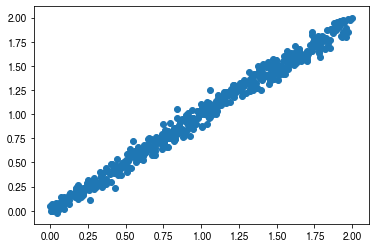

In [100]:
plt.scatter(np.asarray(dataset[:,1]).flatten(),2*np.asarray(msd3_20_exp).flatten())

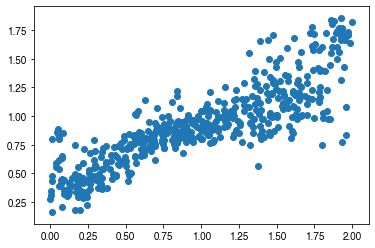

In [101]:
plt.scatter(np.asarray(dataset[:,1]).flatten(),np.asarray(predictions).flatten())

In [123]:
#Using different models according to traj length
predictions=[]

for traj in valid_tra[0][:2000]:
    traj=(traj-np.mean(traj))/np.std(traj)
    jj=len(traj)
    #print(np.mean(traj),np.std(traj))
    k=int(jj/334) #Choosing which model to use
    predictions.append(meta_model[k].predict(np.asarray(traj).reshape(1,len(traj),1)).flatten())
    

In [4]:
len(meta_model2)

NameError: name 'meta_model2' is not defined

In [46]:
#function to apply different nets on trajectories of different lengths
#it assumes equal spacing of the nets and that they are centered at 1/4 of the range
def many_net(nets,traj_set,di,min_tr=0,center=25,max_tr=1000,comb=True):
    n_nets=len(nets) #number of nets we can use
    sp=max_tr/n_nets  #length of range that on which each net will be used
    #print(sp)
    predictions_comb=[]
    for traj in traj_set:
        #normalizing trajectory
        traj=(traj-np.mean(traj))/np.std(traj)
        
        jj=len(traj)
        #print(jj)
        rl=int(jj/di)*di  #cutting the trajectory to fit to  multiple
        #print(rl)
        rs_traj = np.asarray(traj[:rl]).reshape(1,int(rl/di),di) # reshaped trajectory to fir network requirement
        k=int((rl-min_tr)/sp)  #choosing which net to use
        #of the network length
        print(len(traj),"chosen net",k)
        pr_b=nets[k].predict(rs_traj).flatten()
        
        if comb==True:
            if ((rl-k*sp>sp/2)and(k<n_nets-1)):
                print("combine! length=",rl,
                      "chosen net=",k,"distance between chosen net and traj",rl-k*sp)
                pr_2b=nets[k+1].predict(rs_traj).flatten()
                pr_b=(pr_b+pr_2b)/2
        predictions_comb.append(pr_b)
        
    return np.asarray(predictions_comb).flatten()
     
    

        
    

In [6]:
from many_net import many_net

In [24]:
int(35/1)*35

1225

In [9]:
many_net(meta_model2,valid_tra[0][20:35],di=[1,1,1])

array([0.9729928 , 0.82085145, 1.275191  , 1.5831723 , 0.50959134,
       1.38391   , 0.56277657, 0.69203365, 1.0665041 , 0.6683614 ,
       0.47679764, 1.308899  , 1.4063165 , 0.97578394, 1.9079391 ],
      dtype=float32)

In [9]:
#Combining different models according to traj length
predictions_comb=[]

for traj in valid_tra[0][:100]:
    traj=(traj-np.mean(traj))/np.std(traj)
    jj=len(traj)
    k=int(jj/334)
    print(len(traj),k)
    
    pr_b=meta_model2[k].predict(np.asarray(traj).reshape(1,len(traj),1)).flatten()
    if ((len(traj)-k*334>167)and(k<2)):
        print("combine!",len(traj),k,len(traj)-k*334)
        pr_2b=meta_model2[k+1].predict(np.asarray(traj).reshape(1,len(traj),1)).flatten()
        pr_b=(pr_b+pr_2b)/2
    predictions_comb.append(pr_b)
    

470 1
179 0
combine! 179 0 179
617 1
combine! 617 1 283
595 1
combine! 595 1 261
956 2
762 2
297 0
combine! 297 0 297
835 2
876 2
359 1
286 0
combine! 286 0 286
36 0
992 2
497 1
717 2
992 2
990 2
989 2
508 1
combine! 508 1 174
887 2
951 2
47 0
31 0
549 1
combine! 549 1 215
274 0
combine! 274 0 274
205 0
combine! 205 0 205
902 2
898 2
663 1
combine! 663 1 329
811 2
549 1
combine! 549 1 215
54 0
65 0
881 2
318 0
combine! 318 0 318
284 0
combine! 284 0 284
937 2
219 0
combine! 219 0 219
200 0
combine! 200 0 200
900 2
51 0
123 0
96 0
744 2


KeyboardInterrupt: 

In [13]:
len(predictions_comb)

1083

In [15]:
traj.shape

(806,)

In [17]:
trr=np.flipud(traj)

In [19]:
trr[0:10]

array([0.7634405 , 0.86789557, 0.74425584, 0.9898982 , 0.99862917,
       1.04174578, 0.99926263, 1.01694802, 1.10673702, 1.07922088])

In [20]:
traj[-10:]

array([1.07922088, 1.10673702, 1.01694802, 0.99926263, 1.04174578,
       0.99862917, 0.9898982 , 0.74425584, 0.86789557, 0.7634405 ])

In [10]:
#Combining different models according to traj length and reverting the trajectory
predictions_comb_rev=[]

for traj in valid_tra[0][:20]:
    traj=(np.flipud(traj)-np.mean(traj))/np.std(traj)
    jj=len(traj)
    k=int(jj/334)
    print(len(traj),k)
    
    pr_b=meta_model2[k].predict(np.asarray(traj).reshape(1,len(traj),1)).flatten()
    if ((len(traj)-k*334>167)and(k<2)):
        print("combine!",len(traj),k,len(traj)-k*334)
        pr_2b=meta_model2[k+1].predict(np.asarray(traj).reshape(1,len(traj),1)).flatten()
        pr_b=(pr_b+pr_2b)/2
    predictions_comb_rev.append(pr_b)
    

470 1
179 0
combine! 179 0 179
617 1
combine! 617 1 283
595 1
combine! 595 1 261
956 2
762 2
297 0
combine! 297 0 297
835 2
876 2
359 1
286 0
combine! 286 0 286
36 0
992 2
497 1
717 2
992 2
990 2
989 2
508 1
combine! 508 1 174
887 2


In [23]:
print(np.asarray(predictions_comb_rev[:20]).flatten(),np.asarray(predictions_comb[:20]).flatten())

[1.0351291  1.1439233  1.0107954  0.48580077 0.8805319  1.5976403
 2.0019507  0.7301897  1.3087589  0.76933116 1.3797426  1.4685291
 0.61606836 1.0847945  0.9553368  0.3021151  1.1535947  0.7803389
 0.8354068  0.5814173 ] [0.7322498  0.82565325 0.5549228  0.5636774  0.7736417  1.4773697
 0.45895424 1.0095767  0.95829344 1.2087739  1.283188   1.2442133
 0.568964   0.73800457 0.70131195 0.3231595  0.7133266  0.5126469
 1.3208249  0.5295361 ]


In [100]:
valid_lab[0].flatten()

AttributeError: 'list' object has no attribute 'flatten'

In [125]:
np.mean(np.abs(np.asarray(predictions).flatten()-np.asarray(valid_lab[0][:1000]).flatten()))

0.3713231398940086

In [54]:
np.mean(np.abs(np.asarray(predictions_comb[:1000]).flatten()-np.asarray(valid_lab[0][:1000]).flatten()))

0.295001162879169

In [53]:
np.mean(np.abs(np.asarray(predictions_comb_rev[:1000]).flatten()-np.asarray(valid_lab[0][:1000]).flatten()))

0.4216552858427167

In [49]:
from andi import diffusion_models as DF

fbm = DF.oneD().fbm(T = 1000, alpha = 0.5)
fbm_rev=np.flipud(fbm)

In [50]:
model_norm_long2.predict(np.asarray(fbm).reshape(1,len(fbm),1)).flatten()

array([0.79965186], dtype=float32)

In [51]:
model_norm_long2.predict(np.asarray(fbm_rev).reshape(1,len(fbm_rev),1)).flatten()

array([0.7609705], dtype=float32)

In [29]:
np.mean(np.abs((np.asarray(predictions_comb_rev[:1000]).flatten()
                +np.asarray(predictions_comb[:1000]).flatten())/2
        -np.asarray(valid_lab[0][:1000]).flatten()))

0.3352347957909107

In [131]:
#Combining different models according to traj length
predictions_comb2=[]

for traj in valid_tra[0][:1000]:
    traj=(traj-np.mean(traj))/np.std(traj)
    jj=len(traj)
    k=int(jj/334)
    print(len(traj),k)
    
    pr_b=meta_model2[k].predict(np.asarray(traj).reshape(1,len(traj),1)).flatten()
    if ((len(traj)-k*334>167)and(k<2)):
        print("combine!",len(traj),k,len(traj)-k*334)
        pr_2b=meta_model2[k+1].predict(np.asarray(traj).reshape(1,len(traj),1)).flatten()
        pr_b=(pr_b+pr_2b)/2
    predictions_comb2.append(pr_b)
    

470 1
179 0
combine! 179 0 179
617 1
combine! 617 1 283
595 1
combine! 595 1 261
956 2
762 2
297 0
combine! 297 0 297
835 2
876 2
359 1
286 0
combine! 286 0 286
36 0
992 2
497 1
717 2
992 2
990 2
989 2
508 1
combine! 508 1 174
887 2
951 2
47 0
31 0
549 1
combine! 549 1 215
274 0
combine! 274 0 274
205 0
combine! 205 0 205
902 2
898 2
663 1
combine! 663 1 329
811 2
549 1
combine! 549 1 215
54 0
65 0
881 2
318 0
combine! 318 0 318
284 0
combine! 284 0 284
937 2
219 0
combine! 219 0 219
200 0
combine! 200 0 200
900 2
51 0
123 0
96 0
744 2
576 1
combine! 576 1 242
96 0
962 2
218 0
combine! 218 0 218
520 1
combine! 520 1 186
24 0
102 0
493 1
919 2
858 2
182 0
combine! 182 0 182
950 2
859 2
110 0
763 2
248 0
combine! 248 0 248
165 0
510 1
combine! 510 1 176
816 2
20 0
523 1
combine! 523 1 189
103 0
985 2
314 0
combine! 314 0 314
607 1
combine! 607 1 273
533 1
combine! 533 1 199
397 1
212 0
combine! 212 0 212
277 0
combine! 277 0 277
614 1
combine! 614 1 280
145 0
833 2
771 2
73 0
393 1
963 2

766 2
839 2
849 2
241 0
combine! 241 0 241
678 2
556 1
combine! 556 1 222
702 2
696 2
762 2
85 0
981 2
679 2
558 1
combine! 558 1 224
819 2
409 1
643 1
combine! 643 1 309
621 1
combine! 621 1 287
781 2
408 1
371 1
714 2
563 1
combine! 563 1 229
904 2
974 2
16 0
142 0
376 1
521 1
combine! 521 1 187
533 1
combine! 533 1 199
98 0
641 1
combine! 641 1 307
780 2
438 1
57 0
776 2
619 1
combine! 619 1 285
713 2
245 0
combine! 245 0 245
886 2
793 2
723 2
483 1
716 2
875 2
286 0
combine! 286 0 286
316 0
combine! 316 0 316
123 0
316 0
combine! 316 0 316
597 1
combine! 597 1 263
452 1
202 0
combine! 202 0 202
156 0
883 2
523 1
combine! 523 1 189
298 0
combine! 298 0 298
182 0
combine! 182 0 182
174 0
combine! 174 0 174
502 1
combine! 502 1 168
682 2
984 2
302 0
combine! 302 0 302
606 1
combine! 606 1 272
819 2
624 1
combine! 624 1 290
223 0
combine! 223 0 223
773 2
157 0
932 2
433 1
725 2
121 0
259 0
combine! 259 0 259
911 2
967 2
786 2
660 1
combine! 660 1 326
928 2
644 1
combine! 644 1 310
815 

In [120]:
#Combining different models according to traj length and making final prediction
predictions_sub=[]

for traj in validation[0]:
    traj=(traj-np.mean(traj))/np.std(traj)
    jj=len(traj)
    k=int(jj/334)
    print(len(traj),k)
    
    pr_b=meta_model[k].predict(np.asarray(traj).reshape(1,len(traj),1)).flatten()
    if ((len(traj)-k*334>167)and(k<2)):
        print("combine!",len(traj),k,len(traj)-k*334)
        pr_2b=meta_model[k+1].predict(np.asarray(traj).reshape(1,len(traj),1)).flatten()
        pr_b=(pr_b+pr_2b)/2
    predictions_sub.append(pr_b)

489 1
746 2
773 2
420 1
46 0
97 0
192 0
combine! 192 0 192
350 1
25 0
413 1
926 2
135 0
154 0
932 2
47 0
133 0
403 1
833 2
297 0
combine! 297 0 297
620 1
combine! 620 1 286
497 1
21 0
69 0
206 0
combine! 206 0 206
619 1
combine! 619 1 285
152 0
639 1
combine! 639 1 305
463 1
851 2
368 1
879 2
333 0
combine! 333 0 333
369 1
486 1
186 0
combine! 186 0 186
50 0
65 0
200 0
combine! 200 0 200
614 1
combine! 614 1 280
35 0
419 1
496 1
836 2
481 1
422 1
242 0
combine! 242 0 242
688 2
878 2
724 2
424 1
517 1
combine! 517 1 183
627 1
combine! 627 1 293
585 1
combine! 585 1 251
769 2
509 1
combine! 509 1 175
480 1
544 1
combine! 544 1 210
91 0
34 0
440 1
738 2
162 0
552 1
combine! 552 1 218
912 2
633 1
combine! 633 1 299
384 1
989 2
588 1
combine! 588 1 254
655 1
combine! 655 1 321
615 1
combine! 615 1 281
63 0
429 1
571 1
combine! 571 1 237
295 0
combine! 295 0 295
439 1
128 0
882 2
621 1
combine! 621 1 287
535 1
combine! 535 1 201
512 1
combine! 512 1 178
148 0
857 2
785 2
508 1
combine! 508 1

738 2
93 0
599 1
combine! 599 1 265
431 1
703 2
232 0
combine! 232 0 232
265 0
combine! 265 0 265
775 2
613 1
combine! 613 1 279
578 1
combine! 578 1 244
297 0
combine! 297 0 297
318 0
combine! 318 0 318
455 1
660 1
combine! 660 1 326
214 0
combine! 214 0 214
868 2
153 0
711 2
948 2
491 1
493 1
476 1
750 2
755 2
812 2
407 1
988 2
841 2
158 0
262 0
combine! 262 0 262
826 2
971 2
848 2
592 1
combine! 592 1 258
569 1
combine! 569 1 235
737 2
344 1
988 2
907 2
747 2
753 2
715 2
726 2
847 2
575 1
combine! 575 1 241
607 1
combine! 607 1 273
798 2
274 0
combine! 274 0 274
728 2
279 0
combine! 279 0 279
88 0
568 1
combine! 568 1 234
665 1
combine! 665 1 331
790 2
531 1
combine! 531 1 197
424 1
837 2
151 0
204 0
combine! 204 0 204
960 2
941 2
482 1
250 0
combine! 250 0 250
23 0
648 1
combine! 648 1 314
711 2
800 2
466 1
284 0
combine! 284 0 284
966 2
249 0
combine! 249 0 249
596 1
combine! 596 1 262
262 0
combine! 262 0 262
775 2
880 2
301 0
combine! 301 0 301
866 2
769 2
282 0
combine! 282 0 2

611 1
combine! 611 1 277
885 2
835 2
11 0
122 0
443 1
610 1
combine! 610 1 276
678 2
488 1
456 1
838 2
783 2
224 0
combine! 224 0 224
820 2
955 2
552 1
combine! 552 1 218
627 1
combine! 627 1 293
771 2
887 2
731 2
526 1
combine! 526 1 192
61 0
962 2
576 1
combine! 576 1 242
120 0
393 1
910 2
998 2
843 2
567 1
combine! 567 1 233
278 0
combine! 278 0 278
513 1
combine! 513 1 179
863 2
451 1
232 0
combine! 232 0 232
383 1
34 0
409 1
249 0
combine! 249 0 249
790 2
832 2
242 0
combine! 242 0 242
932 2
697 2
820 2
567 1
combine! 567 1 233
318 0
combine! 318 0 318
107 0
373 1
398 1
361 1
427 1
737 2
482 1
124 0
641 1
combine! 641 1 307
340 1
606 1
combine! 606 1 272
260 0
combine! 260 0 260
166 0
628 1
combine! 628 1 294
360 1
202 0
combine! 202 0 202
335 1
651 1
combine! 651 1 317
700 2
915 2
389 1
189 0
combine! 189 0 189
152 0
950 2
522 1
combine! 522 1 188
189 0
combine! 189 0 189
817 2
731 2
342 1
957 2
218 0
combine! 218 0 218
826 2
339 1
239 0
combine! 239 0 239
751 2
26 0
353 1
933 2


combine! 589 1 255
546 1
combine! 546 1 212
839 2
430 1
287 0
combine! 287 0 287
525 1
combine! 525 1 191
309 0
combine! 309 0 309
16 0
225 0
combine! 225 0 225
237 0
combine! 237 0 237
116 0
60 0
554 1
combine! 554 1 220
303 0
combine! 303 0 303
52 0
745 2
99 0
587 1
combine! 587 1 253
538 1
combine! 538 1 204
934 2
719 2
573 1
combine! 573 1 239
135 0
215 0
combine! 215 0 215
223 0
combine! 223 0 223
727 2
575 1
combine! 575 1 241
88 0
86 0
554 1
combine! 554 1 220
553 1
combine! 553 1 219
334 1
877 2
48 0
412 1
978 2
803 2
172 0
combine! 172 0 172
864 2
512 1
combine! 512 1 178
830 2
529 1
combine! 529 1 195
113 0
32 0
726 2
977 2
414 1
623 1
combine! 623 1 289
693 2
360 1
775 2
503 1
combine! 503 1 169
45 0
734 2
184 0
combine! 184 0 184
642 1
combine! 642 1 308
794 2
103 0
298 0
combine! 298 0 298
951 2
985 2
184 0
combine! 184 0 184
217 0
combine! 217 0 217
806 2
995 2
997 2
885 2
988 2
208 0
combine! 208 0 208
612 1
combine! 612 1 278
767 2
352 1
191 0
combine! 191 0 191
936 2
3

624 1
combine! 624 1 290
159 0
957 2
184 0
combine! 184 0 184
67 0
220 0
combine! 220 0 220
361 1
764 2
641 1
combine! 641 1 307
461 1
928 2
946 2
93 0
408 1
461 1
964 2
651 1
combine! 651 1 317
677 2
905 2
334 1
894 2
245 0
combine! 245 0 245
214 0
combine! 214 0 214
404 1
444 1
405 1
954 2
465 1
51 0
291 0
combine! 291 0 291
558 1
combine! 558 1 224
924 2
457 1
414 1
713 2
136 0
190 0
combine! 190 0 190
296 0
combine! 296 0 296
297 0
combine! 297 0 297
179 0
combine! 179 0 179
603 1
combine! 603 1 269
829 2
203 0
combine! 203 0 203
224 0
combine! 224 0 224
107 0
307 0
combine! 307 0 307
676 2
285 0
combine! 285 0 285
698 2
900 2
151 0
140 0
905 2
561 1
combine! 561 1 227
635 1
combine! 635 1 301
951 2
488 1
933 2
599 1
combine! 599 1 265
131 0
641 1
combine! 641 1 307
41 0
36 0
259 0
combine! 259 0 259
538 1
combine! 538 1 204
924 2
89 0
344 1
270 0
combine! 270 0 270
358 1
736 2
506 1
combine! 506 1 172
528 1
combine! 528 1 194
247 0
combine! 247 0 247
740 2
234 0
combine! 234 0 234

795 2
349 1
816 2
243 0
combine! 243 0 243
965 2
616 1
combine! 616 1 282
441 1
465 1
112 0
224 0
combine! 224 0 224
116 0
164 0
115 0
116 0
493 1
604 1
combine! 604 1 270
475 1
721 2
214 0
combine! 214 0 214
81 0
201 0
combine! 201 0 201
351 1
675 2
986 2
592 1
combine! 592 1 258
998 2
686 2
800 2
153 0
680 2
639 1
combine! 639 1 305
394 1
992 2
399 1
612 1
combine! 612 1 278
969 2
617 1
combine! 617 1 283
509 1
combine! 509 1 175
310 0
combine! 310 0 310
785 2
569 1
combine! 569 1 235
104 0
341 1
372 1
531 1
combine! 531 1 197
566 1
combine! 566 1 232
73 0
925 2
119 0
246 0
combine! 246 0 246
12 0
710 2
254 0
combine! 254 0 254
715 2
916 2
744 2
267 0
combine! 267 0 267
771 2
896 2
123 0
561 1
combine! 561 1 227
575 1
combine! 575 1 241
568 1
combine! 568 1 234
289 0
combine! 289 0 289
533 1
combine! 533 1 199
965 2
743 2
57 0
595 1
combine! 595 1 261
547 1
combine! 547 1 213
951 2
959 2
292 0
combine! 292 0 292
176 0
combine! 176 0 176
195 0
combine! 195 0 195
397 1
320 0
combine! 3

756 2
542 1
combine! 542 1 208
745 2
798 2
28 0
356 1
748 2
350 1
138 0
719 2
645 1
combine! 645 1 311
828 2
440 1
906 2
797 2
416 1
515 1
combine! 515 1 181
301 0
combine! 301 0 301
944 2
636 1
combine! 636 1 302
611 1
combine! 611 1 277
144 0
689 2
685 2
39 0
812 2
231 0
combine! 231 0 231
680 2
657 1
combine! 657 1 323
617 1
combine! 617 1 283
711 2
799 2
515 1
combine! 515 1 181
766 2
164 0
713 2
208 0
combine! 208 0 208
467 1
430 1
228 0
combine! 228 0 228
170 0
combine! 170 0 170
387 1
589 1
combine! 589 1 255
808 2
330 0
combine! 330 0 330
767 2
576 1
combine! 576 1 242
433 1
59 0
518 1
combine! 518 1 184
571 1
combine! 571 1 237
247 0
combine! 247 0 247
247 0
combine! 247 0 247
42 0
790 2
232 0
combine! 232 0 232
666 1
combine! 666 1 332
269 0
combine! 269 0 269
27 0
76 0
349 1
174 0
combine! 174 0 174
566 1
combine! 566 1 232
962 2
543 1
combine! 543 1 209
406 1
420 1
314 0
combine! 314 0 314
137 0
807 2
678 2
986 2
328 0
combine! 328 0 328
822 2
195 0
combine! 195 0 195
501 1

977 2
381 1
654 1
combine! 654 1 320
169 0
combine! 169 0 169
47 0
364 1
556 1
combine! 556 1 222
648 1
combine! 648 1 314
115 0
375 1
921 2
879 2
423 1
157 0
191 0
combine! 191 0 191
744 2
918 2
772 2
970 2
341 1
573 1
combine! 573 1 239
756 2
326 0
combine! 326 0 326
432 1
559 1
combine! 559 1 225
482 1
96 0
854 2
450 1
663 1
combine! 663 1 329
493 1
996 2
189 0
combine! 189 0 189
805 2
809 2
824 2
751 2
746 2
995 2
959 2
724 2
349 1
665 1
combine! 665 1 331
30 0
327 0
combine! 327 0 327
485 1
773 2
730 2
328 0
combine! 328 0 328
533 1
combine! 533 1 199
663 1
combine! 663 1 329
491 1
391 1
88 0
421 1
26 0
633 1
combine! 633 1 299
956 2
451 1
695 2
178 0
combine! 178 0 178
477 1
38 0
628 1
combine! 628 1 294
114 0
635 1
combine! 635 1 301
958 2
624 1
combine! 624 1 290
869 2
462 1
718 2
975 2
341 1
545 1
combine! 545 1 211
115 0
622 1
combine! 622 1 288
469 1
35 0
808 2
222 0
combine! 222 0 222
488 1
661 1
combine! 661 1 327
300 0
combine! 300 0 300
784 2
54 0
177 0
combine! 177 0 17

combine! 291 0 291
464 1
680 2
591 1
combine! 591 1 257
128 0
403 1
415 1
949 2
552 1
combine! 552 1 218
512 1
combine! 512 1 178
804 2
161 0
492 1
702 2
682 2
392 1
158 0
382 1
723 2
556 1
combine! 556 1 222
231 0
combine! 231 0 231
313 0
combine! 313 0 313
205 0
combine! 205 0 205
741 2
344 1
907 2
995 2
666 1
combine! 666 1 332
195 0
combine! 195 0 195
726 2
699 2
39 0
888 2
731 2
512 1
combine! 512 1 178
345 1
51 0
756 2
226 0
combine! 226 0 226
358 1
566 1
combine! 566 1 232
712 2
727 2
42 0
242 0
combine! 242 0 242
772 2
359 1
610 1
combine! 610 1 276
217 0
combine! 217 0 217
289 0
combine! 289 0 289
33 0
232 0
combine! 232 0 232
983 2
477 1
627 1
combine! 627 1 293
50 0
904 2
92 0
945 2
890 2
241 0
combine! 241 0 241
288 0
combine! 288 0 288
963 2
19 0
493 1
314 0
combine! 314 0 314
531 1
combine! 531 1 197
611 1
combine! 611 1 277
690 2
113 0
676 2
965 2
59 0
320 0
combine! 320 0 320
701 2
488 1
768 2
852 2
624 1
combine! 624 1 290
786 2
856 2
581 1
combine! 581 1 247
695 2
489

766 2
282 0
combine! 282 0 282
662 1
combine! 662 1 328
602 1
combine! 602 1 268
192 0
combine! 192 0 192
525 1
combine! 525 1 191
992 2
674 2
213 0
combine! 213 0 213
321 0
combine! 321 0 321
719 2
317 0
combine! 317 0 317
776 2
21 0
268 0
combine! 268 0 268
881 2
814 2
356 1
11 0
661 1
combine! 661 1 327
763 2
619 1
combine! 619 1 285
371 1
706 2
306 0
combine! 306 0 306
814 2
49 0
204 0
combine! 204 0 204
421 1
358 1
978 2
22 0
104 0
193 0
combine! 193 0 193
761 2
429 1
370 1
105 0
69 0
137 0
268 0
combine! 268 0 268
397 1
949 2
736 2
490 1
350 1
192 0
combine! 192 0 192
476 1
556 1
combine! 556 1 222
279 0
combine! 279 0 279
319 0
combine! 319 0 319
168 0
combine! 168 0 168
281 0
combine! 281 0 281
988 2
874 2
534 1
combine! 534 1 200
783 2
851 2
414 1
687 2
170 0
combine! 170 0 170
370 1
998 2
979 2
940 2
124 0
711 2
937 2
852 2
819 2
136 0
485 1
548 1
combine! 548 1 214
523 1
combine! 523 1 189
825 2
226 0
combine! 226 0 226
115 0
869 2
570 1
combine! 570 1 236
430 1
687 2
987 2


872 2
180 0
combine! 180 0 180
551 1
combine! 551 1 217
805 2
289 0
combine! 289 0 289
509 1
combine! 509 1 175
882 2
174 0
combine! 174 0 174
151 0
296 0
combine! 296 0 296
833 2
247 0
combine! 247 0 247
365 1
984 2
566 1
combine! 566 1 232
332 0
combine! 332 0 332
563 1
combine! 563 1 229
702 2
542 1
combine! 542 1 208
507 1
combine! 507 1 173
449 1
23 0
558 1
combine! 558 1 224
870 2
415 1
228 0
combine! 228 0 228
75 0
648 1
combine! 648 1 314
347 1
952 2
381 1
251 0
combine! 251 0 251
678 2
400 1
44 0
680 2
439 1
732 2
682 2
84 0
531 1
combine! 531 1 197
380 1
355 1
139 0
495 1
581 1
combine! 581 1 247
761 2
890 2
60 0
328 0
combine! 328 0 328
219 0
combine! 219 0 219
83 0
855 2
652 1
combine! 652 1 318
725 2
932 2
38 0
425 1
244 0
combine! 244 0 244
552 1
combine! 552 1 218
236 0
combine! 236 0 236
244 0
combine! 244 0 244
411 1
264 0
combine! 264 0 264
690 2
880 2
93 0
956 2
231 0
combine! 231 0 231
507 1
combine! 507 1 173
268 0
combine! 268 0 268
373 1
908 2
504 1
combine! 504 

614 1
combine! 614 1 280
169 0
combine! 169 0 169
19 0
969 2
361 1
546 1
combine! 546 1 212
964 2
861 2
656 1
combine! 656 1 322
757 2
947 2
274 0
combine! 274 0 274
419 1
873 2
275 0
combine! 275 0 275
237 0
combine! 237 0 237
750 2
518 1
combine! 518 1 184
874 2
614 1
combine! 614 1 280
861 2
462 1
84 0
618 1
combine! 618 1 284
420 1
259 0
combine! 259 0 259
48 0
271 0
combine! 271 0 271
921 2
427 1
702 2
600 1
combine! 600 1 266
682 2
602 1
combine! 602 1 268
617 1
combine! 617 1 283
120 0
214 0
combine! 214 0 214
988 2
680 2
522 1
combine! 522 1 188
370 1
886 2
756 2
608 1
combine! 608 1 274
421 1
198 0
combine! 198 0 198
422 1
214 0
combine! 214 0 214
371 1
699 2
894 2
275 0
combine! 275 0 275
880 2
563 1
combine! 563 1 229
900 2
230 0
combine! 230 0 230
271 0
combine! 271 0 271
607 1
combine! 607 1 273
327 0
combine! 327 0 327
787 2
807 2
303 0
combine! 303 0 303
300 0
combine! 300 0 300
422 1
84 0
450 1
113 0
142 0
457 1
327 0
combine! 327 0 327
242 0
combine! 242 0 242
638 1
co

combine! 530 1 196
814 2
535 1
combine! 535 1 201
523 1
combine! 523 1 189
981 2
438 1
789 2
169 0
combine! 169 0 169
515 1
combine! 515 1 181
587 1
combine! 587 1 253
186 0
combine! 186 0 186
476 1
916 2
632 1
combine! 632 1 298
556 1
combine! 556 1 222
258 0
combine! 258 0 258
675 2
374 1
304 0
combine! 304 0 304
334 1
661 1
combine! 661 1 327
701 2
220 0
combine! 220 0 220
249 0
combine! 249 0 249
817 2
961 2
500 1
436 1
50 0
343 1
127 0
782 2
890 2
777 2
752 2
110 0
531 1
combine! 531 1 197
618 1
combine! 618 1 284
446 1
818 2
992 2
203 0
combine! 203 0 203
449 1
746 2
836 2
558 1
combine! 558 1 224
126 0
333 0
combine! 333 0 333
621 1
combine! 621 1 287
349 1
482 1
913 2
405 1
680 2
764 2
728 2
762 2
701 2
393 1
455 1
454 1
572 1
combine! 572 1 238
926 2
973 2
815 2
774 2
856 2
818 2
532 1
combine! 532 1 198
255 0
combine! 255 0 255
936 2
987 2
156 0
246 0
combine! 246 0 246
558 1
combine! 558 1 224
942 2
487 1
410 1
710 2
737 2
505 1
combine! 505 1 171
15 0
665 1
combine! 665 1 3

232 0
combine! 232 0 232
56 0
256 0
combine! 256 0 256
911 2
364 1
234 0
combine! 234 0 234
118 0
949 2
167 0
467 1
956 2
96 0
921 2
381 1
325 0
combine! 325 0 325
188 0
combine! 188 0 188
820 2
783 2
518 1
combine! 518 1 184
804 2
139 0
649 1
combine! 649 1 315
135 0
822 2
824 2
72 0
156 0
994 2
776 2
44 0
113 0
802 2
599 1
combine! 599 1 265
528 1
combine! 528 1 194
390 1
979 2
622 1
combine! 622 1 288
961 2
445 1
393 1
170 0
combine! 170 0 170
745 2
368 1
723 2
569 1
combine! 569 1 235
121 0
907 2
145 0
709 2
855 2
721 2
503 1
combine! 503 1 169
357 1
683 2
752 2
805 2
448 1
302 0
combine! 302 0 302
906 2
793 2
774 2
718 2
339 1
29 0
891 2
968 2
135 0
330 0
combine! 330 0 330
339 1
707 2
909 2
738 2
206 0
combine! 206 0 206
867 2
472 1
354 1
967 2
790 2
202 0
combine! 202 0 202
802 2
600 1
combine! 600 1 266
83 0
627 1
combine! 627 1 293
365 1
411 1
16 0
894 2
609 1
combine! 609 1 275
949 2
727 2
804 2
32 0
726 2
695 2
337 1
372 1
844 2
858 2
11 0
633 1
combine! 633 1 299
723 2
219 

975 2
620 1
combine! 620 1 286
870 2
778 2
267 0
combine! 267 0 267
503 1
combine! 503 1 169
389 1
133 0
390 1
862 2
23 0
297 0
combine! 297 0 297
935 2
69 0
653 1
combine! 653 1 319
549 1
combine! 549 1 215
410 1
840 2
333 0
combine! 333 0 333
946 2
192 0
combine! 192 0 192
25 0
133 0
465 1
162 0
699 2
642 1
combine! 642 1 308
874 2
367 1
665 1
combine! 665 1 331
129 0
27 0
282 0
combine! 282 0 282
394 1
192 0
combine! 192 0 192
221 0
combine! 221 0 221
527 1
combine! 527 1 193
205 0
combine! 205 0 205
350 1
511 1
combine! 511 1 177
265 0
combine! 265 0 265
913 2
691 2
349 1
366 1
777 2
512 1
combine! 512 1 178
921 2
267 0
combine! 267 0 267
786 2
995 2
343 1
965 2
115 0
476 1
451 1
171 0
combine! 171 0 171
673 2
788 2
456 1
679 2
381 1
450 1
83 0
32 0
883 2
589 1
combine! 589 1 255
219 0
combine! 219 0 219
886 2
235 0
combine! 235 0 235
656 1
combine! 656 1 322
35 0
554 1
combine! 554 1 220
350 1
877 2
486 1
871 2
503 1
combine! 503 1 169
397 1
935 2
82 0
516 1
combine! 516 1 182
114

In [121]:
predictions_sub=np.asarray(predictions_sub).flatten()

In [13]:
#Combining different models according to traj length and making final prediction
predictions_sub2=[]

for traj in validation[0]:
    traj=(traj-np.mean(traj))/np.std(traj)
    jj=len(traj)
    k=int(jj/334)
    #print(len(traj),k)
    
    pr_b=meta_model2[k].predict(np.asarray(traj).reshape(1,len(traj),1)).flatten()
    if ((len(traj)-k*334>167)and(k<2)):
        #print("combine!",len(traj),k,len(traj)-k*334)
        pr_2b=meta_model2[k+1].predict(np.asarray(traj).reshape(1,len(traj),1)).flatten()
        pr_b=(pr_b+pr_2b)/2
    predictions_sub2.append(pr_b)

In [14]:
predictions_sub2=np.asarray(predictions_sub2).flatten()

In [15]:
pred_to_txt = np.ones((len(predictions_sub2), 2))
pred_to_txt[:, 1] = predictions_sub2

np.savetxt('task1.txt', pred_to_txt.astype(float), fmt = '%1.5f', delimiter = ';')

In [75]:
aa={}
for i in range(10):
    print(len(X1[0][i]))
    

15
15
15
15
15
15
15
15
15
15


In [15]:
XX1=sorted(X1[0], key=len)

In [70]:
aa={}
shortest=len(XX1[0])
for i in range(10):
    print(len(XX1[i]))
    s=len(XX1[i])
    sf=int(50*np.floor((s-shortest)/50)+shortest)
    print(sf)
    aa[s]=XX1[i][:sf]

40
40
60
40
87
40
103
90
104
90
350
340
369
340
824
790
837
790
907
890


In [68]:
aa[100]

KeyError: 100

In [66]:
len(aa[60])

40

In [51]:
aa=np.empty(5,)
for i in range(10):
    print(len(XX1[i]))
    s=int(np.floor(len(XX1[i])/200))
    print(s)
    aa[s]=XX1[i]

40
0


ValueError: setting an array element with a sequence.

In [41]:
aa

{40: [-0.03836528739820868,
  0.2079126848848909,
  1.6493721746520775,
  -0.2593123103320664,
  -1.0620755564684987,
  -1.0908919519453817,
  -3.1854492980351474,
  -4.887013112489542,
  -3.5276149824835157,
  -3.3597900596892405,
  -2.4717895194490893,
  -2.295896255640338,
  -2.8789020832393293,
  -3.811302203276199,
  -3.5123955887834097,
  -3.467637132121441,
  -3.0657675723063496,
  -3.027043104790344,
  -3.7709022177346814,
  -3.58745305242181,
  -4.444453244640268,
  -3.7926672268231214,
  -1.7472911065434167,
  -1.5680482117991115,
  -0.6923379918357665,
  -1.3275283407377572,
  -2.2672861786548717,
  -3.5138088891363553,
  -3.8803764269170524,
  -4.571324969223683,
  -4.819682863676466,
  -3.899380389004291,
  -3.6356270836089055,
  -3.249138875675035,
  -3.6397095551964678,
  -4.427458107737051,
  -3.975329377008129,
  -3.9382762635992594,
  -4.346412475396133,
  -3.7213233214051176],
 60: [0.08339578708619468,
  0.029124768579896893,
  0.14537884773203796,
  -0.022053730303

In [38]:
for i in range(30,90):
    print(aa[i])

KeyError: 30

In [ ]:
chunks = [data[x:x+100] for x in range(0, len(data), 100)]


In [ ]:
chunks = [X1[0][i] for i in range(0, len(data), 100)]


In [33]:

aa

{40: [-0.03836528739820868,
  0.2079126848848909,
  1.6493721746520775,
  -0.2593123103320664,
  -1.0620755564684987,
  -1.0908919519453817,
  -3.1854492980351474,
  -4.887013112489542,
  -3.5276149824835157,
  -3.3597900596892405,
  -2.4717895194490893,
  -2.295896255640338,
  -2.8789020832393293,
  -3.811302203276199,
  -3.5123955887834097,
  -3.467637132121441,
  -3.0657675723063496,
  -3.027043104790344,
  -3.7709022177346814,
  -3.58745305242181,
  -4.444453244640268,
  -3.7926672268231214,
  -1.7472911065434167,
  -1.5680482117991115,
  -0.6923379918357665,
  -1.3275283407377572,
  -2.2672861786548717,
  -3.5138088891363553,
  -3.8803764269170524,
  -4.571324969223683,
  -4.819682863676466,
  -3.899380389004291,
  -3.6356270836089055,
  -3.249138875675035,
  -3.6397095551964678,
  -4.427458107737051,
  -3.975329377008129,
  -3.9382762635992594,
  -4.346412475396133,
  -3.7213233214051176],
 60: [0.08339578708619468,
  0.029124768579896893,
  0.14537884773203796,
  -0.022053730303

In [23]:
pred_norm_chi={}
for i in cl:
    #print('traj length=',i,'\n')

    test_tim_step=np.arange(i)
    show_time_coll=np.tile(test_tim_step,(len(bbv[i]),1))
    data_show,label_show,traj_show,times_show=data_split(np.asarray(bbv[i]),
                                                             show_time_coll,labels=np.asarray(ccv[i]),
                                                             start_row=0,num_row=1000,traj_len=i,n_in=0,
                                                             n_samples=1,p_p=1,hmin=0.25,hmax=0.75,
                                                             limith=False,normalization=True)

    pred_norm_chi[i]=model_norm_chi.predict(traj_show.reshape(len(traj_show),i,1)).flatten()

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 25 final_point= 25 data length 25
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 125 final_point= 125 data length 125
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 225 final_point= 225 data length 225
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 325 final_point= 325 data length 325
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 425 final_point= 425 data length 425
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 525 final_point= 525 data length 525
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 625 final_point= 625 data length 625
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 725 final_point= 725 data length 725
n initial= 0 gap= 0
warning!! Overlapping trajector

In [24]:
to=0
j=0
for i in cl:
    j=j+1
    print('len=',i,np.mean(np.abs(pred_norm_chi[i]-np.asarray(ccv[i]))))
    to=to+np.mean(np.abs(pred_norm_chi[i]-np.asarray(ccv[i])))
    print('len=',i, 'intermediate mae=',to/j)

len= 25 0.4362664799571037
len= 25 intermediate mae= 0.4362664799571037
len= 125 0.34248548797965056
len= 125 intermediate mae= 0.38937598396837714
len= 225 0.2766526488184929
len= 225 intermediate mae= 0.3518015389184157
len= 325 0.24619035279750823
len= 325 intermediate mae= 0.32539874238818883
len= 425 0.22625087648034095
len= 425 intermediate mae= 0.30556916920661925
len= 525 0.2372711357653141
len= 525 intermediate mae= 0.29418616363306843
len= 625 0.2975899694621563
len= 625 intermediate mae= 0.29467242160865237
len= 725 0.35396810715049504
len= 725 intermediate mae= 0.30208438230138274
len= 825 0.3704703206390143
len= 825 intermediate mae= 0.30968281989445295
len= 925 0.4137163192659616
len= 925 intermediate mae= 0.3200861698316038
